# Load libraries and data

In [11]:
library(DESeq2)
library(enrichplot)
library(clusterProfiler)
library(ggplot2)
library(org.Hs.eg.db)
library(gridExtra)
library(grid)
source('../utils/utils.R')

In [18]:
deseq_results <- readRDS('../../rds/NGS-20250519/deseq2_brain_all comparison.rds')

In [20]:
#load protein_coding counts
pccounts = as.matrix(read.csv('../../output/NGS-20250519/counts_protein_coding.csv',row.names = 1))
dim(pccounts)

[1] 20070    16

In [31]:
samples=read.table("samples.tsv",header = T,check.names = F)
rownames(samples) = samples$id
samples

,condition,replicate,tissue,organoid.stage,organoid.line,timepoint,name,id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
VL11,MLB2,s1,brain,NA,NA,10d,MLB2_brain_s1_10d_VL11,VL11
VL12,MLB2,s2,brain,NA,NA,10d,MLB2_brain_s2_10d_VL12,VL12
VL13,VA1,s1,brain,NA,NA,10d,VA1_brain_s1_10d_VL13,VL13
VL14,VA1,s2,brain,NA,NA,10d,VA1_brain_s2_10d_VL14,VL14
VL15,HAstV4,s1,brain,NA,NA,10d,HAstV4_brain_s1_10d_VL15,VL15
VL16,HAstV4,s2,brain,NA,NA,10d,HAstV4_brain_s2_10d_VL16,VL16
VL17,mock,s1,brain,NA,NA,10d,mock_brain_s1_10d_VL17,VL17
VL18,mock,s2,brain,NA,NA,10d,mock_brain_s2_10d_VL18,VL18
VL19,mock_trypsin,s1,brain,NA,NA,10d,mock_trypsin_brain_s1_10d_VL19,VL19


In [4]:
genes <- readRDS('../../rds/NGS-20250519/genes.rds')
genes

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000279928,1,182696,184174,+,ENSG00000279928,DDX11L17,unprocessed_pseudogene
ENSG00000228037,1,2581560,2584533,+,ENSG00000228037,NA,lncRNA
ENSG00000142611,1,3069168,3438621,+,ENSG00000142611,PRDM16,protein_coding
ENSG00000284616,1,5301928,5307394,-,ENSG00000284616,NA,lncRNA
ENSG00000157911,1,2403964,2413797,-,ENSG00000157911,PEX10,protein_coding
ENSG00000269896,1,2350414,2352820,-,ENSG00000269896,NA,transcribed_processed_pseudogene
ENSG00000228463,1,257864,359681,-,ENSG00000228463,NA,transcribed_processed_pseudogene
ENSG00000260972,1,5492978,5494674,+,ENSG00000260972,NA,lncRNA
ENSG00000224340,1,10054445,10054781,-,ENSG00000224340,RPL21P21,processed_pseudogene


# PlotPair

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_text_repel()`).”


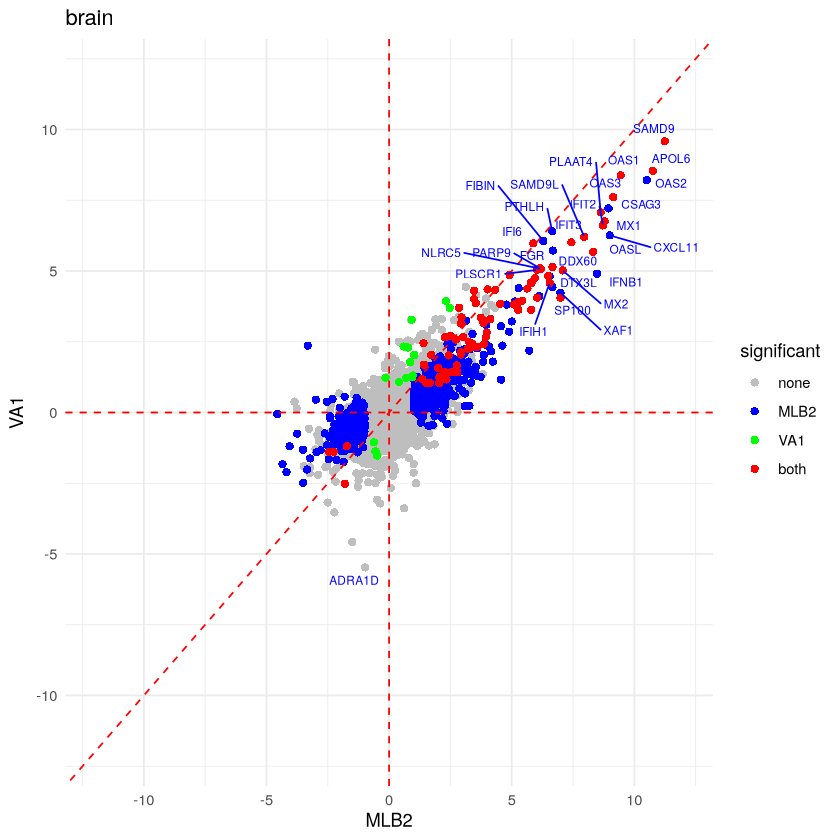

In [56]:
z=plotPair(deseq_results$`MLB2/mock`,
           deseq_results$`VA1/mock`,
           xlab='MLB2',ylab='VA1',title='brain',genes=genes)
z

In [57]:
ggsave("plotpair_brain_10d_MLB2_vs_VA1.pdf", plot = z, width = 10, height = 8, dpi = 300)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_text_repel()`).”


# why VA1 has so few significant genes?

In [37]:
# why VA1 has so few significant genes?
f = deseq_results$`MLB2/mock`$padj < 0.05 & deseq_results$`MLB2/mock`$log2FoldChange>5 & 
    deseq_results$`VA1/mock`$padj > 0.05 & deseq_results$`VA1/mock`$log2FoldChange > 3
gg = genes[rownames(deseq_results$`MLB2/mock`[f,]),]
gg

,chr,start,end,strand,gene_id,gene_name,gene_biotype
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
ENSG00000000938,1,27612064,27635185,-,ENSG00000000938,FGR,protein_coding
ENSG00000134321,2,6865557,6898239,+,ENSG00000134321,RSAD2,protein_coding
ENSG00000123609,2,151270470,151289894,-,ENSG00000123609,NMI,protein_coding
ENSG00000081148,3,101222546,101320575,-,ENSG00000081148,IMPG2,protein_coding
ENSG00000169248,4,76033682,76041415,-,ENSG00000169248,CXCL11,protein_coding
ENSG00000268916,X,152753921,152760222,+,ENSG00000268916,CSAG3,protein_coding
ENSG00000174417,8,109086585,109121565,+,ENSG00000174417,TRHR,protein_coding
ENSG00000171855,9,21077104,21077942,-,ENSG00000171855,IFNB1,protein_coding
ENSG00000176971,11,26994112,26997087,+,ENSG00000176971,FIBIN,protein_coding


In [43]:
write.table(gg, "gg.tsv", sep = "\t", quote = FALSE, row.names = FALSE)

In [38]:
deseq_results$`VA1/mock`[gg$gene_id,]

log2 fold change (MLE): condition VA1 vs mock 
Wald test p-value: condition VA1 vs mock 
DataFrame with 13 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSG00000000938  16.49542        5.72330   1.70116   3.36436 0.000767227
ENSG00000134321 175.02457        4.11379   1.30454   3.15343 0.001613613
ENSG00000123609  10.90387        3.92219   1.55056   2.52953 0.011421494
ENSG00000081148   7.13074        4.81372   1.96734   2.44681 0.014412546
ENSG00000169248  61.83880        6.26050   2.12431   2.94708 0.003207890
...                   ...            ...       ...       ...         ...
ENSG00000176971   9.62831        6.06332   1.95316   3.10437  0.00190685
ENSG00000168062  13.38997        4.43399   1.72200   2.57491  0.01002649
ENSG00000087494   9.50135        6.40879   1.95940   3.27080  0.00107244
ENSG00000111335  66.22624        8.21360   3.68158   2.23100  0.0256812

In [47]:
# сохранить таблицу генов из VA1 набора, которые, вероятно, тоже активируются, но, вероятно, не проходят порог
# Загружаем таблицу с именами генов и gene_id
gg <- read.table("gg.tsv", sep = "\t", header = TRUE)
# Подтягиваем DEG-данные для этих генов
drgg <- deseq_results$`VA1/mock`[gg$gene_id, ]
drgg$gene_id <- rownames(drgg)  # превращаем rownames в колонку
# Объединяем по gene_id
merged <- merge(gg, drgg, by = "gene_id", all.x = TRUE)
# Удаляем ненужные столбцы
merged <- subset(merged, select = -c(chr, start, end))
# Сохраняем итоговую таблицу
write.table(merged, "drgg_with_names.tsv", sep = "\t", quote = FALSE, row.names = FALSE)

#так и видно, что по p-value они проходят, но поправка на множественное тестирование их отсекает.
# это гены, которые хорошие находки у MLB2, но которые не видны у VA1, хотя LFC у них высокий (deseq_results$`MLB2/mock`$padj < 0.05 
#& deseq_results$`MLB2/mock`$log2FoldChange>5 & deseq_results$`VA1/mock`$padj > 0.05 & deseq_results$`VA1/mock`$log2FoldChange > 3)

In [53]:
t=pccounts[gg$gene_id,]
colnames(t) = samples[colnames(pccounts),'name']
t(t)

,ENSG00000000938,ENSG00000134321,ENSG00000123609,ENSG00000081148,ENSG00000169248,ENSG00000268916,ENSG00000174417,ENSG00000171855,ENSG00000176971,ENSG00000168062,ENSG00000087494,ENSG00000111335,ENSG00000132530
MLB2_brain_s1_10d_VL11,60,1015,51,20,396,145,24,557,14,58,28,421,79
MLB2_brain_s2_10d_VL12,32,172,12,11,60,17,11,79,12,33,5,57,35
VA1_brain_s1_10d_VL13,33,276,27,2,67,35,12,49,4,17,16,100,16
VA1_brain_s2_10d_VL14,25,92,7,9,19,25,11,18,22,7,18,23,5
HAstV4_brain_s1_10d_VL15,4,21,1,11,0,0,11,0,7,1,0,0,0
HAstV4_brain_s2_10d_VL16,0,6,3,15,9,0,20,0,5,2,7,0,2
mock_brain_s1_10d_VL17,0,6,1,0,0,0,0,0,0,0,0,0,0
mock_brain_s2_10d_VL18,1,13,1,0,1,0,1,2,0,1,0,0,1
mock_trypsin_brain_s1_10d_VL19,0,0,0,0,3,0,6,0,31,1,12,0,0
mock_trypsin_brain_s2_10d_VL20,1,4,0,2,3,0,4,0,2,3,7,0,0


In [54]:
# Отбираем подтаблицу по нужным gene_id
t = pccounts[gg$gene_id, ]

# Переименовываем колонки по названию сэмплов
colnames(t) = samples[colnames(pccounts), 'name']

# Присваиваем gene_name как названия строк
rownames(t) = gg$gene_name

# Транспонируем
t_transposed = t(t)

# Преобразуем в data.frame и добавляем названия сэмплов как первый столбец
t_df = data.frame(sample = rownames(t_transposed), t_transposed, check.names = FALSE)

# Сохраняем в файл
write.table(t_df, "transposed_counts_with_genes.tsv", sep = "\t", quote = FALSE, row.names = FALSE)


In [50]:
write.table(t, "t.tsv", sep = "\t", quote = FALSE, row.names = FALSE)

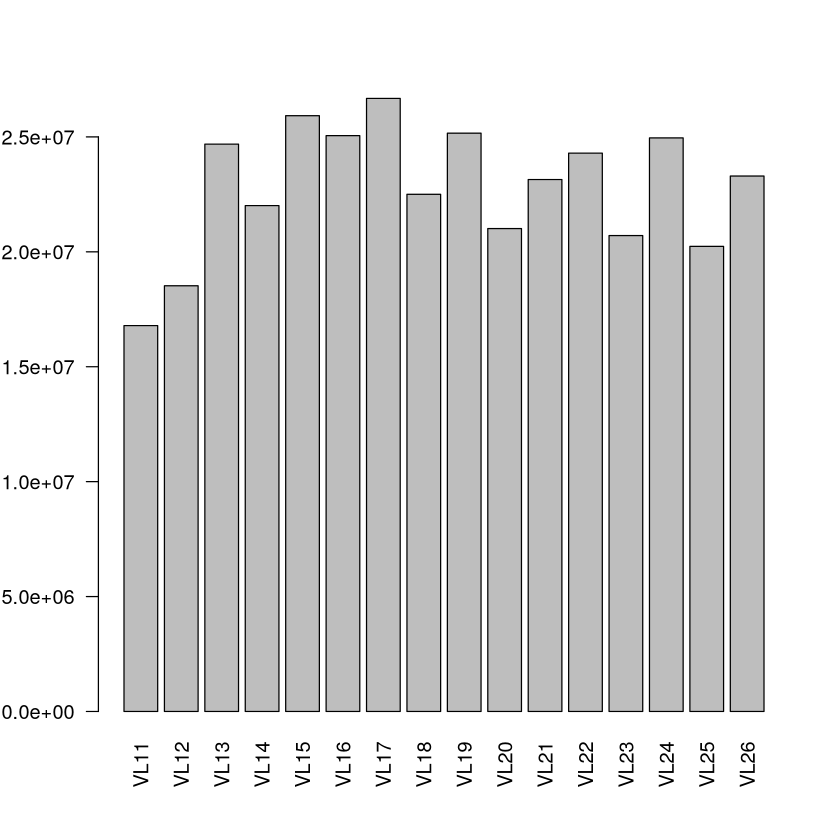

In [36]:
barplot(colSums(pccounts),las=2)

In [7]:
# Проверка идентификаторов
head(deseq_b_MLB2$gene_id)

[1] "ENSG00000162398" "ENSG00000166863" "ENSG00000175445" "ENSG00000125813"
[5] "ENSG00000068078" "ENSG00000197705"

# Cnetplot

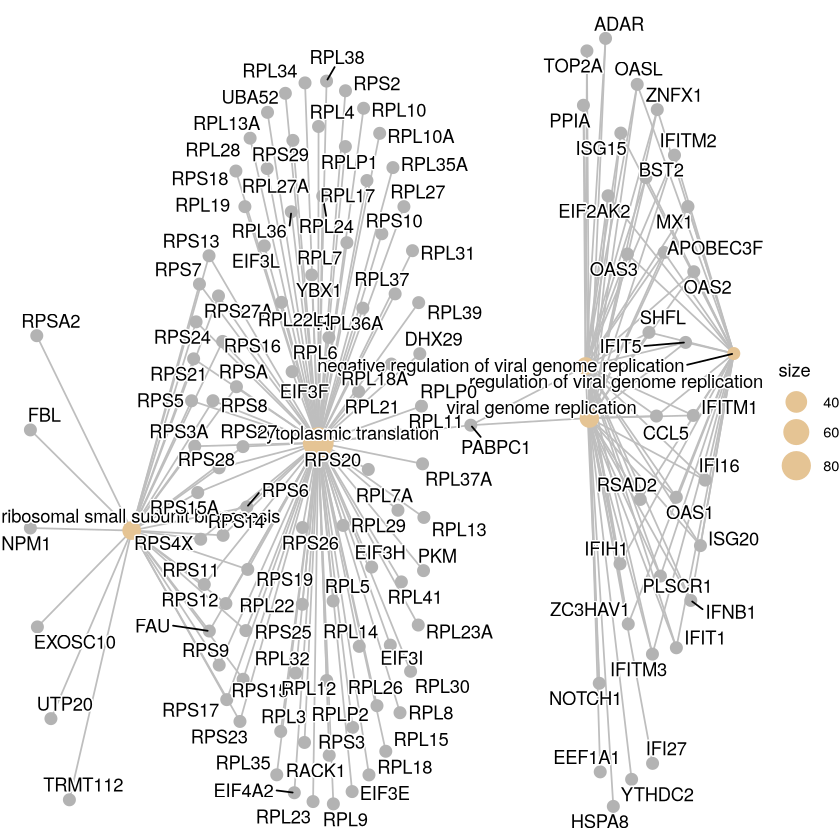

In [8]:
# enrichGO object (ego) for all genes for MLB2 (up and down) 
ego_MLB2 <- enrichGO(
  gene          = deseq_b_MLB2$gene_id,
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",       # или "SYMBOL", если это символы
  ont           = "BP",
  pAdjustMethod = "BH",
  qvalueCutoff  = 0.05,
  readable      = TRUE
)

# Визуализация
cnetplot(ego_MLB2, categorySize = "pvalue")

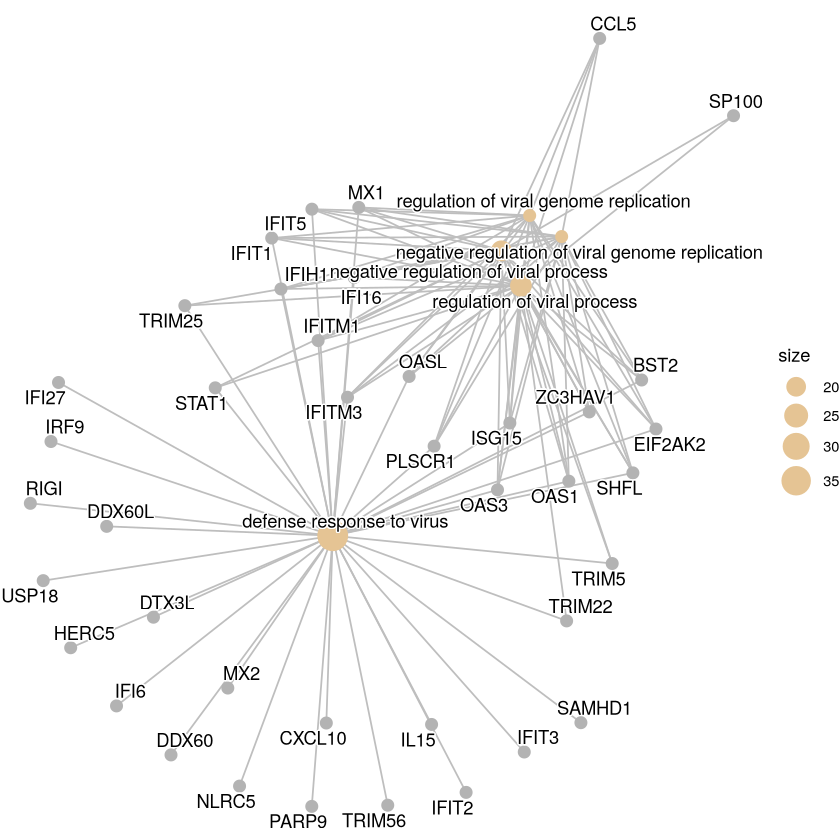

In [9]:
# enrichGO object (ego) for all genes for VA1 (up and down)
ego_VA1 <- enrichGO(gene = deseq_b_VA1$gene_id, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_VA1, categorySize = "pvalue")

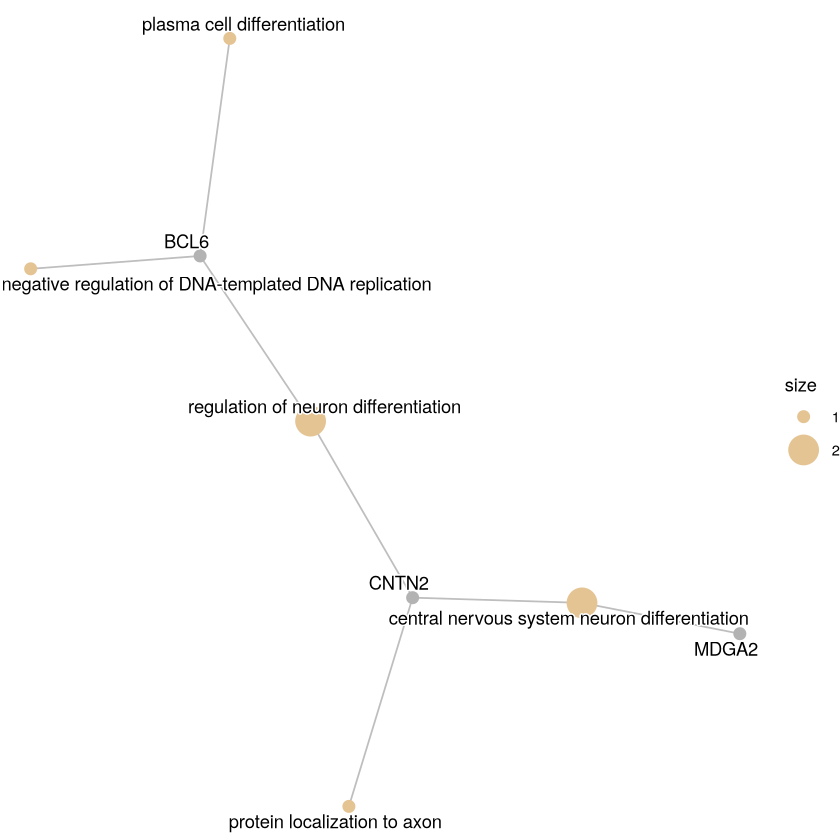

In [10]:
# enrichGO object (ego) for all genes for HAstV4 (up and down)
ego_HAstV4 <- enrichGO(gene = deseq_b_HAstV4$gene_id, 
                OrgDb = org.Hs.eg.db,     # Replace with your organism database
                keyType = "ENSEMBL",      # Or another keyType like "SYMBOL"
                ont = "BP",               # Biological Process GO terms
                pAdjustMethod = "BH",     # Benjamini-Hochberg adjustment
                qvalueCutoff = 0.05,      # Adjust the p-value cutoff as needed
                readable = TRUE)

# Now, use cnetplot with the enrichGO result (ego)
cnetplot(ego_HAstV4, categorySize = "pvalue")

Warning message:
“ggrepel: 46 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


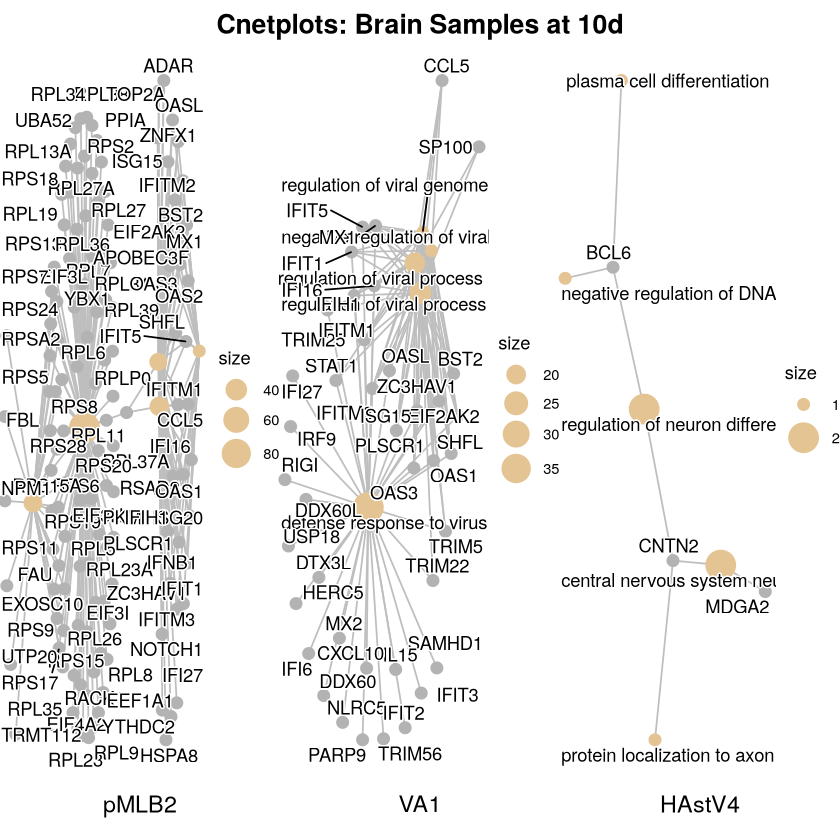

In [11]:
# Merge all ego_plots all viruses in brain at 10d (up and down)
plot_MLB2 <- cnetplot(ego_MLB2, categorySize = "pvalue")
plot_VA1  <- cnetplot(ego_VA1, categorySize = "pvalue")
plot_HAstV4 <- cnetplot(ego_HAstV4, categorySize = "pvalue")

# Create labels for each plot
label_MLB2 <- textGrob("pMLB2", gp = gpar(fontsize = 14))
label_VA1  <- textGrob("VA1", gp = gpar(fontsize = 14))
label_HAstV4 <- textGrob("HAstV4", gp = gpar(fontsize = 14))

# Arrange the plots and their labels
plots_grid <- arrangeGrob(
  plot_MLB2, plot_VA1, plot_HAstV4,
  label_MLB2, label_VA1, label_HAstV4,
  ncol = 3, nrow = 2, 
  heights = c(2, 0.2)  # First row: plots, second row: labels
)

# Create the title
title <- textGrob("Cnetplots: Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))

# Arrange everything together
grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5))

# Adjust plot size
options(repr.plot.width = 30, repr.plot.height = 12)


In [17]:
pdf("Cnetplots: Brain Samples at 10d.pdf", width = 30, height = 12)  # Adjust width & height
grid.draw(grid.arrange(title, plots_grid, ncol = 1, heights = c(0.3, 5)))
dev.off()

pdf 
  2

# Create dataset for up- and downregulated genes for enrichment analysis (cnetplot, GO enrichment, KEGG and REACTOME)

In [86]:
# load filtered deseq data (f <- x$padj < 0.05 & abs(x$log2FoldChange) > 1)
deseq_b_MLB2 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_MLB2_mock.rds')
deseq_b_VA1 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_VA1_mock.rds')
deseq_b_HAstV4 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_HAstV4_mock_trypsin.rds')

In [87]:
#for enrichGO,CompareCluster
MLB2_up <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange > 1 & deseq_b_MLB2$padj < 0.05]
MLB2_down <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange < -1 & deseq_b_MLB2$padj < 0.05]

VA1_up <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange > 1 & deseq_b_VA1$padj < 0.05]
VA1_down <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange < -1 & deseq_b_VA1$padj < 0.05]

HAstV4_up <- deseq_b_HAstV4$gene_id[deseq_b_HAstV4$log2FoldChange > 1 & deseq_b_HAstV4$padj < 0.05]
HAstV4_down <- deseq_b_HAstV4$gene_id[deseq_b_HAstV4$log2FoldChange < -1 & deseq_b_HAstV4$padj < 0.05]

In [96]:
#for enrichKEGG, encrichPathway
MLB2_up_entrez   <- bitr(MLB2_up,   fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)
MLB2_down_entrez <- bitr(MLB2_down, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)
VA1_up_entrez    <- bitr(VA1_up,    fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)
VA1_down_entrez  <- bitr(VA1_down,  fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(MLB2_up, fromType = "ENSEMBL", toType = "ENTREZID", OrgDb = org.Hs.eg.db):
“0.3% of input gene IDs are fail to map...”
'select()' returned 1:many mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



Warning message:
“ggrepel: 46 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


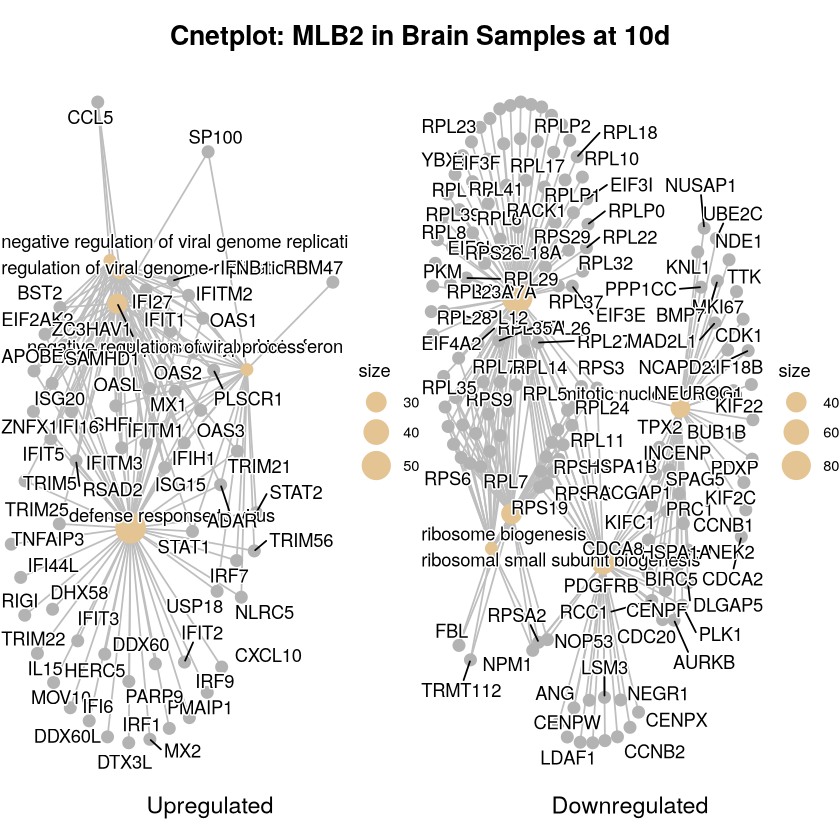

In [85]:
#MLB2_up <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange > 1 & deseq_b_MLB2$padj < 0.05]
#MLB2_down <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange < -1 & deseq_b_MLB2$padj < 0.05]

# GO-анализ
MLB2_ego_up <- enrichGO(gene = MLB2_up,
                        OrgDb = org.Hs.eg.db,
                        keyType = "ENSEMBL",
                        ont = "BP",
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05,
                        readable = TRUE)

MLB2_ego_down <- enrichGO(gene = MLB2_down,
                          OrgDb = org.Hs.eg.db,
                          keyType = "ENSEMBL",
                          ont = "BP",
                          pAdjustMethod = "BH",
                          qvalueCutoff = 0.05,
                          readable = TRUE)

# Построение cnetplot с подписями генов и GO-терминов
plot_MLB2_up <- cnetplot(MLB2_ego_up, categorySize = "pvalue", node_label = "all")
plot_MLB2_down <- cnetplot(MLB2_ego_down, categorySize = "pvalue", node_label = "all")

# Подписи под графиками
label_MLB2_up <- textGrob("Upregulated", gp = gpar(fontsize = 14))
label_MLB2_down <- textGrob("Downregulated", gp = gpar(fontsize = 14))

# Строка графиков
plots_row <- arrangeGrob(
  plot_MLB2_up, plot_MLB2_down,
  ncol = 2
)

# Строка подписей
labels_row <- arrangeGrob(
  label_MLB2_up, label_MLB2_down,
  ncol = 2
)

# Заголовок
title <- textGrob("Cnetplot: MLB2 in Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))

# Финальная компоновка
grid.arrange(
  title,
  plots_row,
  labels_row,
  ncol = 1,
  heights = c(0.5, 5, 0.5)
)


In [23]:
# Фильтрация DEG
#MLB2_up <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange > 1 & deseq_b_MLB2$padj < 0.05]
#MLB2_down <- deseq_b_MLB2$gene_id[deseq_b_MLB2$log2FoldChange < -1 & deseq_b_MLB2$padj < 0.05]

# GO-анализ
MLB2_ego_up <- enrichGO(gene = MLB2_up,
                        OrgDb = org.Hs.eg.db,
                        keyType = "ENSEMBL",
                        ont = "BP",
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05,
                        readable = TRUE)

MLB2_ego_down <- enrichGO(gene = MLB2_down,
                          OrgDb = org.Hs.eg.db,
                          keyType = "ENSEMBL",
                          ont = "BP",
                          pAdjustMethod = "BH",
                          qvalueCutoff = 0.05,
                          readable = TRUE)

# Построение cnetplot с названиями
plot_MLB2_up <- cnetplot(MLB2_ego_up, categorySize = "pvalue", node_label = "all")
plot_MLB2_down <- cnetplot(MLB2_ego_down, categorySize = "pvalue", node_label = "all")

# Подписи
label_MLB2_up <- textGrob("Upregulated", gp = gpar(fontsize = 14))
label_MLB2_down <- textGrob("Downregulated", gp = gpar(fontsize = 14))

# Компоновка
plots_row <- arrangeGrob(plot_MLB2_up, plot_MLB2_down, ncol = 2)
labels_row <- arrangeGrob(label_MLB2_up, label_MLB2_down, ncol = 2)
title <- textGrob("Cnetplot: MLB2 in Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))
final_plot <- arrangeGrob(title, plots_row, labels_row, ncol = 1, heights = c(0.5, 5, 0.5))

# Сохранение в PDF
pdf("08_cnetplot_brain_MLB2_up&down.pdf", width = 16, height = 8)  # Размеры можно изменить при необходимости
grid.draw(final_plot)
dev.off()


pdf 
  2

In [27]:
# Функция для безопасного построения cnetplot с проверками
safe_cnetplot <- function(ego, ...){
  if(is.null(ego)) return(nullGrob())
  ego_df <- as.data.frame(ego)
  if(nrow(ego_df) < 1) return(nullGrob())
  
  cat_num <- length(unique(ego_df$ID))
  gene_num <- length(unique(unlist(strsplit(ego_df$geneID, "/"))))
  
  if(cat_num < 2 || gene_num < 2){
    message("Too few categories or genes for cnetplot.")
    return(nullGrob())
  }
  
  tryCatch(
    cnetplot(ego, categorySize = "pvalue", node_label = "all", ...),
    error = function(e) {
      message("Error in cnetplot: ", e$message)
      nullGrob()
    }
  )
}

# Фильтрация DEG для VA1
VA1_up <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange > 1 & deseq_b_VA1$padj < 0.05]
VA1_down <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange < -1 & deseq_b_VA1$padj < 0.05]

# GO-анализ
VA1_ego_up <- enrichGO(gene = VA1_up,
                       OrgDb = org.Hs.eg.db,
                       keyType = "ENSEMBL",
                       ont = "BP",
                       pAdjustMethod = "BH",
                       qvalueCutoff = 0.05,
                       readable = TRUE)

VA1_ego_down <- enrichGO(gene = VA1_down,
                         OrgDb = org.Hs.eg.db,
                         keyType = "ENSEMBL",
                         ont = "BP",
                         pAdjustMethod = "BH",
                         qvalueCutoff = 0.05,
                         readable = TRUE)

# Построение cnetplot с подписями, с использованием безопасной функции
plot_VA1_up <- safe_cnetplot(VA1_ego_up)
plot_VA1_down <- safe_cnetplot(VA1_ego_down)

# Подписи
label_VA1_up <- textGrob("Upregulated", gp = gpar(fontsize = 14))
label_VA1_down <- textGrob("Downregulated", gp = gpar(fontsize = 14))

# Компоновка
plots_row <- arrangeGrob(plot_VA1_up, plot_VA1_down, ncol = 2)
labels_row <- arrangeGrob(label_VA1_up, label_VA1_down, ncol = 2)
title <- textGrob("Cnetplot: VA1 in Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))
final_plot <- arrangeGrob(title, plots_row, labels_row, ncol = 1, heights = c(0.5, 5, 0.5))

# Сохранение в PDF
pdf("08_cnetplot_brain_VA1_up&down.pdf", width = 16, height = 8)
grid.draw(final_plot)
dev.off()


pdf 
  2

In [34]:
VA1_down_table <- subset(deseq_b_VA1, log2FoldChange < -1 & padj < 0.05, select = c("gene_id", "log2FoldChange", "padj"))
print(VA1_down_table)

# И сохранить, если нужно
#write.csv(VA1_down_table, "VA1_downregulated_genes_detailed.csv", row.names = FALSE)


                        gene_id log2FoldChange         padj
ENSG00000167306 ENSG00000167306      -2.517749 2.711854e-02
ENSG00000113361 ENSG00000113361      -1.523179 1.294187e-05
ENSG00000204388 ENSG00000204388      -1.392632 4.339006e-02
ENSG00000132692 ENSG00000132692      -1.391156 6.246204e-03
ENSG00000188517 ENSG00000188517      -1.375235 1.825161e-05
ENSG00000137154 ENSG00000137154      -1.188835 5.084306e-03
ENSG00000185477 ENSG00000185477      -1.054218 2.924482e-03


In [35]:
length(VA1_down)

[1] 7

In [36]:
mapped_genes <- AnnotationDbi::select(org.Hs.eg.db, keys=VA1_down, keytype="ENSEMBL", columns="SYMBOL")
mapped_genes

'select()' returned 1:1 mapping between keys and columns



ENSEMBL,SYMBOL
<chr>,<chr>
ENSG00000167306,MYO5B
ENSG00000113361,CDH6
ENSG00000204388,HSPA1B
ENSG00000132692,BCAN
ENSG00000188517,COL25A1
ENSG00000137154,RPS6
ENSG00000185477,GPRIN3


In [33]:
# Фильтрация DEG
VA1_up <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange > 1 & deseq_b_VA1$padj < 0.05]
VA1_down <- deseq_b_VA1$gene_id[deseq_b_VA1$log2FoldChange < -1 & deseq_b_VA1$padj < 0.05]

# GO-анализ с мягким порогом (qvalueCutoff=1)
VA1_ego_up <- enrichGO(gene = VA1_up,
                       OrgDb = org.Hs.eg.db,
                       keyType = "ENSEMBL",
                       ont = "BP",
                       pAdjustMethod = "BH",
                       qvalueCutoff = 1,
                       readable = TRUE)

VA1_ego_down <- enrichGO(gene = VA1_down,
                         OrgDb = org.Hs.eg.db,
                         keyType = "ENSEMBL",
                         ont = "BP",
                         pAdjustMethod = "BH",
                         qvalueCutoff = 1,
                         readable = TRUE)

# Функция для безопасного построения cnetplot
safe_cnetplot <- function(ego_object, label_text) {
  if (!is.null(ego_object) && nrow(ego_object) > 0) {
    plot_obj <- cnetplot(ego_object, categorySize = "pvalue", node_label = "all")
    label <- textGrob(label_text, gp = gpar(fontsize = 14))
    return(list(plot = plot_obj, label = label))
  } else {
    message(sprintf("No GO enrichment for %s genes, skipping cnetplot.", label_text))
    return(NULL)
  }
}

# Построение plot и label для up/down
up_plot <- safe_cnetplot(VA1_ego_up, "Upregulated")
down_plot <- safe_cnetplot(VA1_ego_down, "Downregulated")

plots <- list()
labels <- list()

if (!is.null(up_plot)) {
  plots <- c(plots, list(up_plot$plot))
  labels <- c(labels, list(up_plot$label))
}

if (!is.null(down_plot)) {
  plots <- c(plots, list(down_plot$plot))
  labels <- c(labels, list(down_plot$label))
}

if (length(plots) == 0) {
  stop("No GO enrichment plots to display for either up or down genes.")
}

plots_row <- arrangeGrob(grobs = plots, ncol = length(plots))
labels_row <- arrangeGrob(grobs = labels, ncol = length(labels))
title <- textGrob("Cnetplot: VA1 in Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))

final_plot <- arrangeGrob(title, plots_row, labels_row, ncol = 1, heights = c(0.5, 5, 0.5))

pdf("08_cnetplot_brain_VA1_up&down_fixed.pdf", width = 16, height = 8)
grid.draw(final_plot)
dev.off()


No GO enrichment for Downregulated genes, skipping cnetplot.



pdf 
  2

In [29]:
# Фильтрация DEG
HAstV4_up <- deseq_b_HAstV4$gene_id[deseq_b_HAstV4$log2FoldChange > 1 & deseq_b_HAstV4$padj < 0.05]
HAstV4_down <- deseq_b_HAstV4$gene_id[deseq_b_HAstV4$log2FoldChange < -1 & deseq_b_HAstV4$padj < 0.05]

# GO-анализ
HAstV4_ego_up <- enrichGO(gene = HAstV4_up,
                          OrgDb = org.Hs.eg.db,
                          keyType = "ENSEMBL",
                          ont = "BP",
                          pAdjustMethod = "BH",
                          qvalueCutoff = 0.05,
                          readable = TRUE)

HAstV4_ego_down <- enrichGO(gene = HAstV4_down,
                            OrgDb = org.Hs.eg.db,
                            keyType = "ENSEMBL",
                            ont = "BP",
                            pAdjustMethod = "BH",
                            qvalueCutoff = 0.05,
                            readable = TRUE)

# Построение cnetplot с подписями
plot_HAstV4_up <- cnetplot(HAstV4_ego_up, categorySize = "pvalue", node_label = "all")
plot_HAstV4_down <- cnetplot(HAstV4_ego_down, categorySize = "pvalue", node_label = "all")

# Подписи
label_HAstV4_up <- textGrob("Upregulated", gp = gpar(fontsize = 14))
label_HAstV4_down <- textGrob("Downregulated", gp = gpar(fontsize = 14))

# Компоновка
plots_row <- arrangeGrob(plot_HAstV4_up, plot_HAstV4_down, ncol = 2)
labels_row <- arrangeGrob(label_HAstV4_up, label_HAstV4_down, ncol = 2)
title <- textGrob("Cnetplot: HAstV4 in Brain Samples at 10d", gp = gpar(fontsize = 16, fontface = "bold"))
final_plot <- arrangeGrob(title, plots_row, labels_row, ncol = 1, heights = c(0.5, 5, 0.5))

# Сохранение в PDF
pdf("08_cnetplot_brain_HAstV4_up&down.pdf", width = 16, height = 8)
grid.draw(final_plot)
dev.off()


pdf 
  2

In [40]:
#deseq_gdiff = readRDS('../../rds/deseq2_gut_diff_mockvirus.rds')
#deseq_gundiff = readRDS('../../rds/deseq2_gut_undiff_mockvirus.rds')
#deseq_brain = readRDS('../../rds/deseq2_brain_mockvirus.rds')

In [37]:
ls()

[1] "deseq_b_HAstV4"    "deseq_b_MLB2"      "deseq_b_VA1"      
 [4] "down_plot"         "ego_HAstV4"        "ego_MLB2"         
 [7] "ego_MLV2"          "ego_VA1"           "final_plot"       
[10] "HAstV4_down"       "HAstV4_ego_down"   "HAstV4_ego_up"    
[13] "HAstV4_up"         "label_HAstV4"      "label_HAstV4_down"
[16] "label_HAstV4_up"   "label_MLB2"        "label_MLB2_down"  
[19] "label_MLB2_up"     "label_VA1"         "label_VA1_down"   
[22] "label_VA1_up"      "labels"            "labels_row"       
[25] "mapped_genes"      "MLB2_down"         "MLB2_ego_combined"
[28] "MLB2_ego_down"     "MLB2_ego_up"       "MLB2_up"          
[31] "plot_HAstV4"       "plot_HAstV4_down"  "plot_HAstV4_up"   
[34] "plot_MLB2"         "plot_MLB2_down"    "plot_MLB2_up"     
[37] "plot_VA1"          "plot_VA1_down"     "plot_VA1_up"      
[40] "plots"             "plots_grid"        "plots_row"        
[43] "safe_cnetplot"     "title"             "up_plot"          
[46] "VA1_down"          "VA1_down_table"    "VA1_ego_down"     
[49] "VA1_ego_up"        "VA1_up"

# GO Enrichment: Dotplot (compareCluster)

In [2]:
#load genes
genes <- readRDS('../../rds/NGS-20250519/genes.rds')
dim(genes)
gene_uni <- genes$gene_id

[1] 62757     7

In [3]:
deseq_brain = readRDS('../../rds/NGS-20250519/deseq2_brain_all comparison.rds')
b_sgn_genes = lapply(deseq_brain,function(x)rownames(x)[!is.na(x$padj) & x$padj<0.05 & x$log2FoldChange > 1])

In [4]:
b_go = compareCluster(b_sgn_genes,
                       fun='enrichGO',
                       universe      = gene_uni,
                       pAdjustMethod = "BH",
                       ont='ALL',
                       OrgDb = 'org.Hs.eg.db',
                       keyType = 'ENSEMBL')

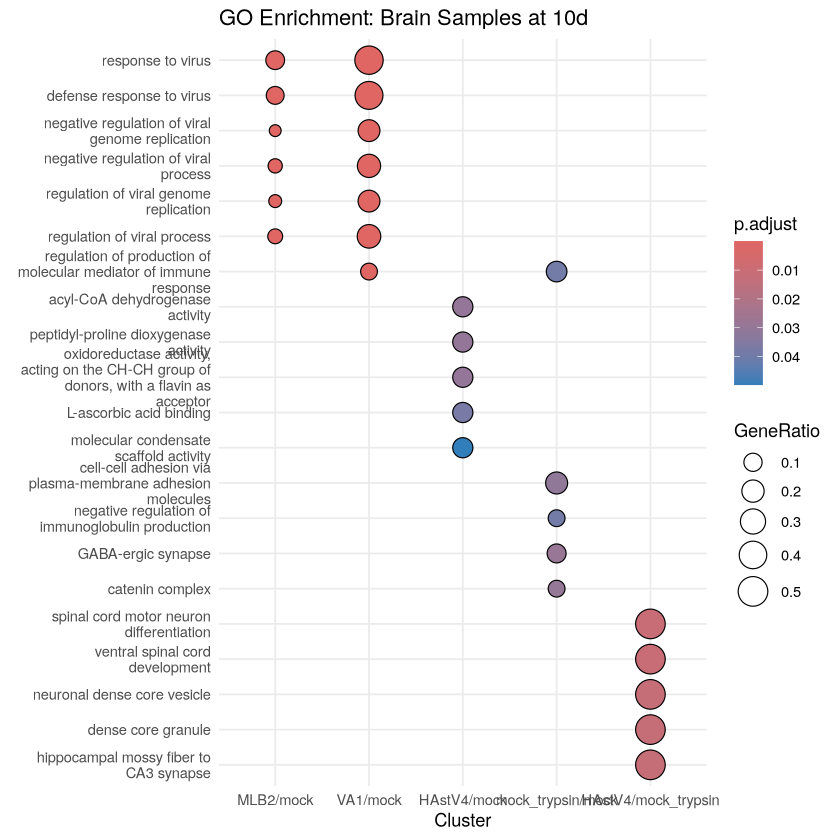

In [5]:
dotplot(b_go) + 
  ggplot2::theme_minimal() + 
  ggplot2::ggtitle("GO Enrichment: Brain Samples at 10d")

In [10]:
plot <- dotplot(b_go) + 
  ggplot2::theme_minimal() + 
  ggplot2::ggtitle("GO Enrichment in Upregulated: Brain Samples at 10d")
ggsave("07_GO Enrichment(5comparisons)_Upregulated_Brain_10d.pdf", plot, width = 20, height = 8)

In [7]:
#deseq_b_MLB2 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_MLB2_mock.rds')
#deseq_b_VA1 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_VA1_mock.rds')
#deseq_b_HAstV4 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_HAstV4_mock_trypsin.rds')

In [89]:
ls()

[1] "deseq_b_HAstV4"     "deseq_b_MLB2"       "deseq_b_VA1"       
 [4] "deseq_results"      "drgg"               "f"                 
 [7] "gene_clusters"      "genes"              "gg"                
[10] "HAstV4_down"        "HAstV4_up"          "label_MLB2_down"   
[13] "label_MLB2_up"      "labels_row"         "merged"            
[16] "MLB2_down"          "MLB2_down_entrez"   "MLB2_ego_down"     
[19] "MLB2_ego_up"        "MLB2_reactome"      "MLB2_reactome_down"
[22] "MLB2_reactome_up"   "MLB2_up"            "MLB2_up_entrez"    
[25] "p1"                 "p2"                 "p3"                
[28] "p4"                 "p5"                 "p6"                
[31] "pccounts"           "plot_MLB2_down"     "plot_MLB2_up"      
[34] "plot_reactome"      "plotPair"           "plots"             
[37] "plots_row"          "samples"            "t"                 
[40] "t_df"               "t_transposed"       "title"             
[43] "VA1_down"           "VA1_down_entrez"    "VA1_reactome_down" 
[46] "VA1_reactome_up"    "VA1_up"             "VA1_up_entrez"     
[49] "z"

In [90]:
gene_clusters <- list(
  MLB2_down = MLB2_down,
  VA1_down = VA1_down,
  HAstV4_down = HAstV4_down
)

compare_down_brain <- compareCluster(
  geneCluster   = gene_clusters,
  fun           = "enrichGO",
  OrgDb         = org.Hs.eg.db,
  keyType       = "ENSEMBL",
  ont           = "BP",
  pAdjustMethod = "BH",
  universe      = genes,  # <- ваш список всех протеин-кодирующих генов
  qvalueCutoff  = 0.05
)


In [95]:
plot2 <- dotplot(compare_down_brain) + 
  ggplot2::theme_minimal() + 
  ggplot2::ggtitle("GO Enrichment in Brain at 10dpi: Downregulated Genes (MLB2, HAstV4) - VA1 showed no significant results")
ggsave("07_GO Enrichment_Downregulated Genes in Brain Samples at 10d.pdf", plot2, width = 20, height = 8)

# KEGG Pathway Enrichment (clusterProfiler)

In [97]:
#library(clusterProfiler)
#library(org.Hs.eg.db)

# KEGG требует ENTREZ ID
#MLB2_up_entrez <- bitr(MLB2_up, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
MLB2_kegg_up <- enrichKEGG(gene         = MLB2_up_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(MLB2_kegg_up)


Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05168,Human Diseases,Infectious disease: viral,hsa05168,Herpes simplex virus 1 infection,33/264,182/9390,0.1813187,6.449176,12.625694,4.519270e-18,1.324146e-15,9.752109e-16,6432/6426/3678/3551/3717/9021/6773/3665/3133/6891/3106/355/4790/3112/3105/5610/3107/6890/330/3134/567/10379/56829/684/6772/23586/64135/6672/3456/4940/4938/4939/6352,33
hsa05169,Human Diseases,Infectious disease: viral,hsa05169,Epstein-Barr virus infection,32/264,204/9390,0.1568627,5.579323,11.246684,1.206072e-15,1.766895e-13,1.301288e-13,4791/3725/3551/6773/8737/3383/3665/3133/6891/4734/4067/3106/355/4790/5971/7128/3112/3105/5610/3107/6890/3134/567/10379/6772/23586/9636/3456/4940/4938/4939/3627,32
hsa05164,Human Diseases,Infectious disease: viral,hsa05164,Influenza A,26/264,173/9390,0.1502890,5.345507,9.811606,1.859881e-12,1.816484e-10,1.337809e-10,3551/103/3717/9021/6773/3383/3665/355/4790/3112/5610/7706/10379/6772/8743/23586/91543/64135/4600/3456/4599/4940/4938/4939/6352/3627,26
hsa05162,Human Diseases,Infectious disease: viral,hsa05162,Measles,20/264,139/9390,0.1438849,5.117724,8.318436,1.647480e-09,1.206779e-07,8.887723e-08,3725/3551/103/2353/6773/3665/355/4790/7128/5610/10379/6772/23586/64135/4600/3456/4599/4940/4938/4939,20
hsa04668,Environmental Information Processing,Signal transduction,hsa04668,TNF signaling pathway,18/264,119/9390,0.1512605,5.380061,8.178276,4.900008e-09,2.450379e-07,1.804662e-07,3725/3551/1051/2353/9021/8737/3383/7412/355/4790/1435/7128/3659/330/3600/3456/6352/3627,18
hsa05167,Human Diseases,Infectious disease: viral,hsa05167,Kaposi sarcoma-associated herpesvirus infection,23/264,196/9390,0.1173469,4.173817,7.637111,5.628991e-09,2.450379e-07,1.804662e-07,5530/2247/3725/3551/3717/2353/6773/3383/3665/3133/4067/3106/355/4790/3105/5610/3709/3107/3134/285/10379/6772/3456,23


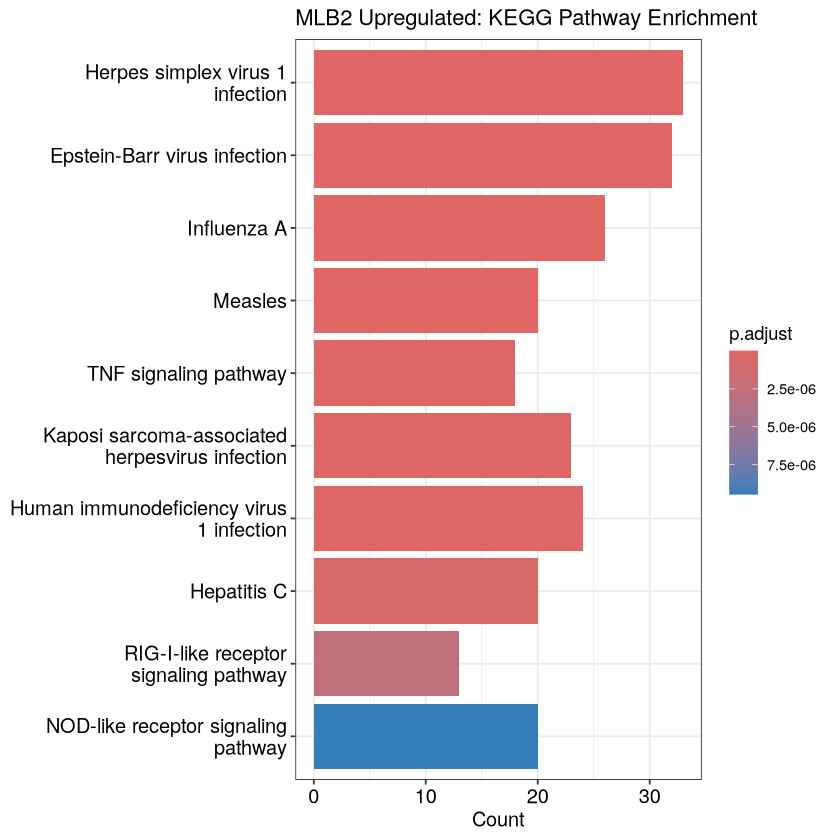

In [98]:
barplot(MLB2_kegg_up, showCategory = 10, title = "MLB2 Upregulated: KEGG Pathway Enrichment")


,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05171,Human Diseases,Infectious disease: viral,hsa05171,Coronavirus disease - COVID-19,85/320,238/9390,0.3571429,10.479911,27.823755,3.115464e-66,8.318288e-64,8.067411e-64,100529239/6173/6129/6229/6170/6188/6128/9349/6168/6191/6189/6228/6146/6230/6227/6130/6133/6137/6175/6142/6181/6194/6135/6169/6207/6223/6122/6134/3921/6160/6176/6203/6187/6167/6139/6152/6202/6164/6218/6205/6209/6155/6208/23521/6235/4736/6144/6124/6154/6233/6156/6161/6171/6193/6165/7311/6217/6204/6232/6125/6210/100526842/6157/6201/6234/6206/25873/6222/6224/6143/6159/6136/11224/6132/2197/6141/6138/6158/388524/9045/6147/5648/6231/200916/6166,85
hsa04110,Cellular Processes,Cell growth and death,hsa04110,Cell cycle,17/320,158/9390,0.1075949,3.157239,5.136413,2.585050e-05,3.440264e-03,3.336506e-03,8900/983/9212/991/9133/9232/894/4085/890/891/5347/7272/57082/701/1870/1031/1032,17
hsa00100,Metabolism,Lipid metabolism,hsa00100,Steroid biosynthesis,6/320,20/9390,0.3000000,8.803125,6.561374,3.865465e-05,3.440264e-03,3.336506e-03,1718/6307/2222/1717/6713/10682,6
hsa04540,Cellular Processes,Cellular community - eukaryotes,hsa04540,Gap junction,11/320,92/9390,0.1195652,3.508492,4.541432,2.770366e-04,1.849219e-02,1.793448e-02,5159/80310/983/2697/203068/10383/10376/56034/347733/2770/7846,11


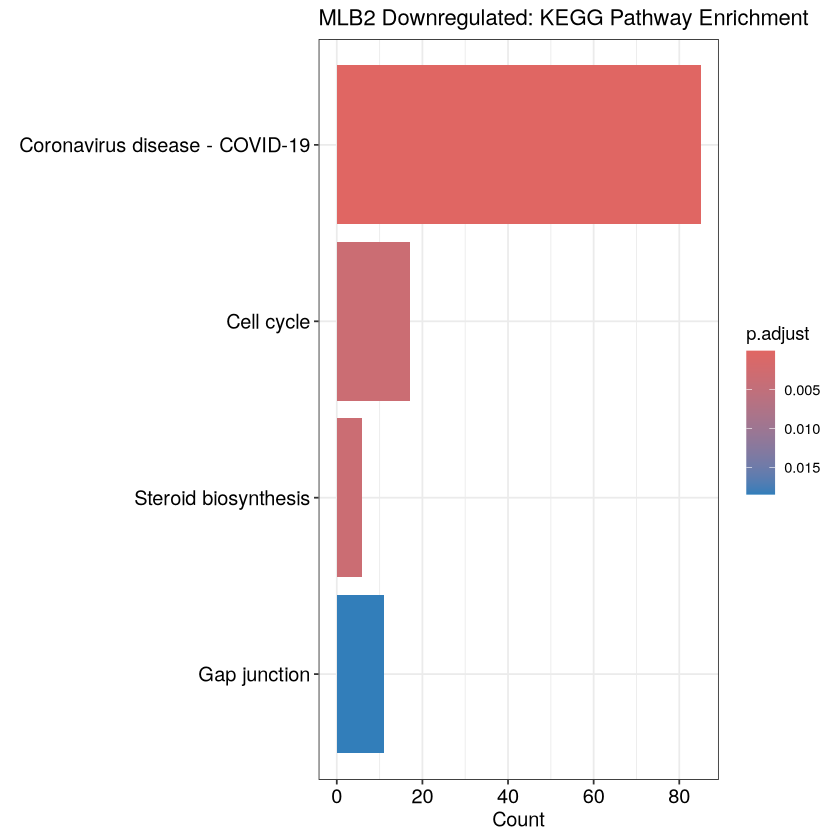

In [99]:
#MLB2_down_entrez <- bitr(MLB2_down, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
MLB2_kegg_down <- enrichKEGG(gene         = MLB2_down_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(MLB2_kegg_down)
barplot(MLB2_kegg_down, showCategory = 10, title = "MLB2 Downregulated: KEGG Pathway Enrichment")


,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05168,Human Diseases,Infectious disease: viral,hsa05168,Herpes simplex virus 1 infection,18/47,182/9390,0.09890110,19.759177,18.125176,1.786814e-19,2.144177e-17,1.561111e-17,6891/3133/5610/56829/3106/6890/10379/6772/3107/23586/3105/567/6672/684/64135/4940/4938/6352,18
hsa05169,Human Diseases,Infectious disease: viral,hsa05169,Epstein-Barr virus infection,16/47,204/9390,0.07843137,15.669587,15.023986,1.135367e-15,6.812202e-14,4.959761e-14,6891/5971/3133/5610/3106/6890/10379/6772/3107/23586/3105/567/9636/4940/4938/3627,16
hsa05164,Human Diseases,Infectious disease: viral,hsa05164,Influenza A,12/47,173/9390,0.06936416,13.858074,12.106528,3.114734e-11,1.245894e-09,9.070980e-10,5610/7706/10379/6772/23586/64135/4600/4599/4940/4938/3627/6352,12
hsa05160,Human Diseases,Infectious disease: viral,hsa05160,Hepatitis C,10/47,159/9390,0.06289308,12.565235,10.431435,4.410699e-09,1.291401e-07,9.402304e-08,5610/10379/6772/23586/3434/4600/4599/4940/4938/3627,10
hsa05170,Human Diseases,Infectious disease: viral,hsa05170,Human immunodeficiency virus 1 infection,11/47,213/9390,0.05164319,10.317651,9.755764,5.380837e-09,1.291401e-07,9.402304e-08,85363/25939/6891/3133/3709/3106/6890/3107/3105/567/684,11
hsa05171,Human Diseases,Infectious disease: viral,hsa05171,Coronavirus disease - COVID-19,11/47,238/9390,0.04621849,9.233864,9.125351,1.715192e-08,3.430384e-07,2.497560e-07,5610/10379/6772/23586/9636/64135/4600/4599/4940/4938/3627,11


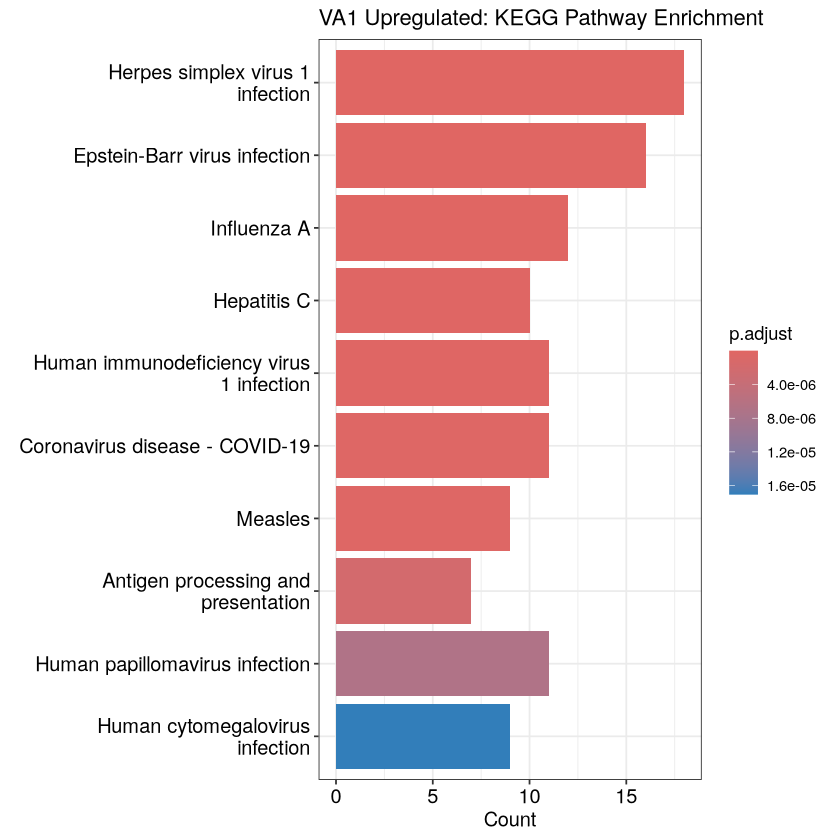

In [100]:
#VA1_up_entrez <- bitr(VA1_up, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
VA1_kegg_up <- enrichKEGG(gene         = VA1_up_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(VA1_kegg_up)
barplot(VA1_kegg_up, showCategory = 10, title = "VA1 Upregulated: KEGG Pathway Enrichment")


In [101]:
#VA1_down_entrez <- bitr(VA1_down, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
VA1_kegg_down <- enrichKEGG(gene         = VA1_down_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(VA1_kegg_down)
barplot(VA1_kegg_down, showCategory = 10, title = "VA1 Downregulated: KEGG Pathway Enrichment")


category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>


Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)

'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05030,Human Diseases,Substance dependence,hsa05030,Cocaine addiction,1/1,49/9390,0.020408163,191.63265,13.806978,0.005218317,0.02939297,0.003867496,5173,1
hsa05031,Human Diseases,Substance dependence,hsa05031,Amphetamine addiction,1/1,69/9390,0.014492754,136.08696,11.622691,0.007348243,0.02939297,0.003867496,5173,1
hsa05017,Human Diseases,Neurodegenerative disease,hsa05017,Spinocerebellar ataxia,1/1,144/9390,0.006944444,65.20833,8.013010,0.015335463,0.03109691,0.004091699,5173,1
hsa05034,Human Diseases,Substance dependence,hsa05034,Alcoholism,1/1,191/9390,0.005235602,49.16230,6.939907,0.020340788,0.03109691,0.004091699,5173,1
hsa04082,NA,NA,hsa04082,Neuroactive ligand signaling,1/1,199/9390,0.005025126,47.18593,6.796023,0.021192758,0.03109691,0.004091699,5173,1
hsa04081,NA,NA,hsa04081,Hormone signaling,1/1,219/9390,0.004566210,42.87671,6.471222,0.023322684,0.03109691,0.004091699,5173,1


'select()' returned 1:1 mapping between keys and columns



,category,subcategory,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa00534,Metabolism,Glycan biosynthesis and metabolism,hsa00534,Glycosaminoglycan biosynthesis - heparan sulfate / heparin,1/3,24/9390,0.04166667,130.4167,11.34817,0.007648963,0.03824481,0.02415462,64579,1


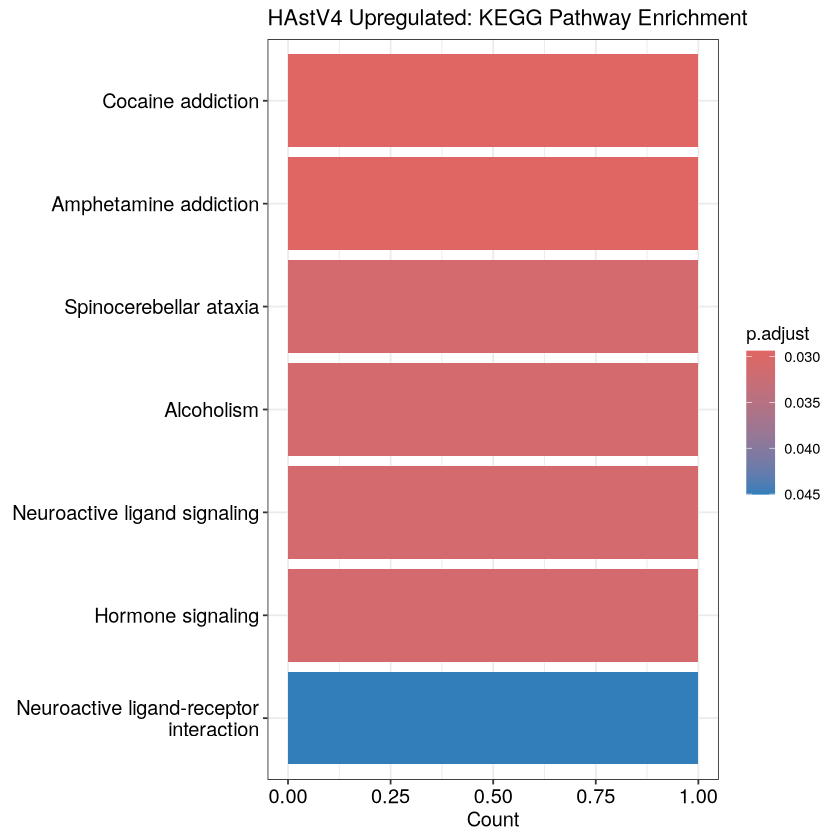

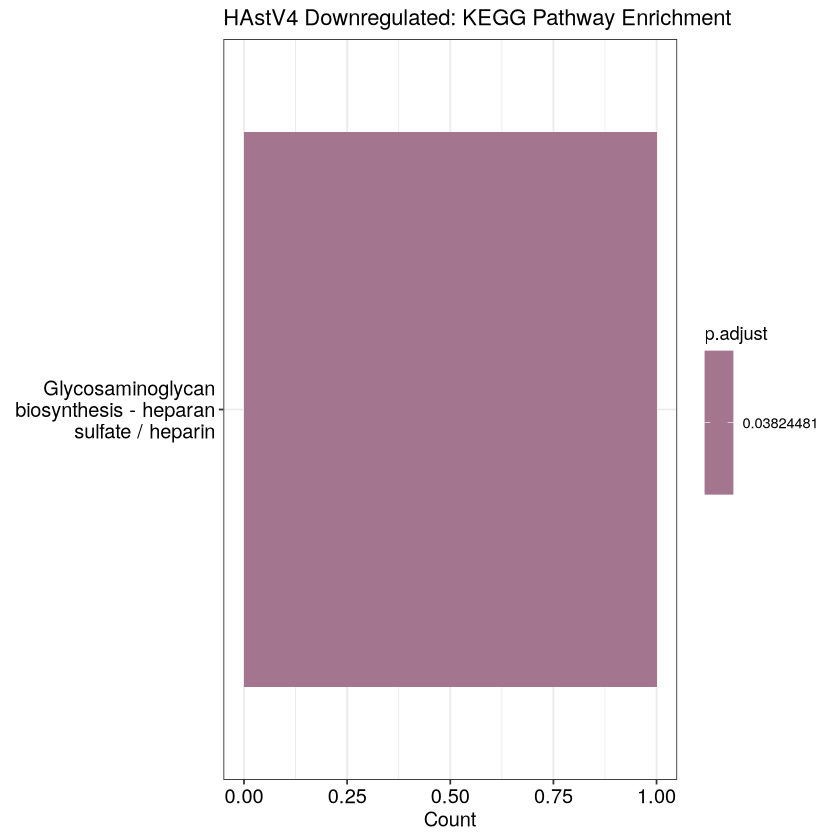

In [103]:
HAstV4_up_entrez <- bitr(HAstV4_up, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
HAstV4_kegg_up <- enrichKEGG(gene         = HAstV4_up_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(HAstV4_kegg_up)
barplot(HAstV4_kegg_up, showCategory = 10, title = "HAstV4 Upregulated: KEGG Pathway Enrichment")

HAstV4_down_entrez <- bitr(HAstV4_down, fromType="ENSEMBL", toType="ENTREZID", OrgDb=org.Hs.eg.db)

# KEGG enrichment
HAstV4_kegg_down <- enrichKEGG(gene         = HAstV4_down_entrez$ENTREZID,
                        organism     = 'hsa',  # Homo sapiens
                        pAdjustMethod = "BH",
                        qvalueCutoff = 0.05)

# Просмотр результатов
head(HAstV4_kegg_down)
barplot(HAstV4_kegg_down, showCategory = 10, title = "HAstV4 Downregulated: KEGG Pathway Enrichment")


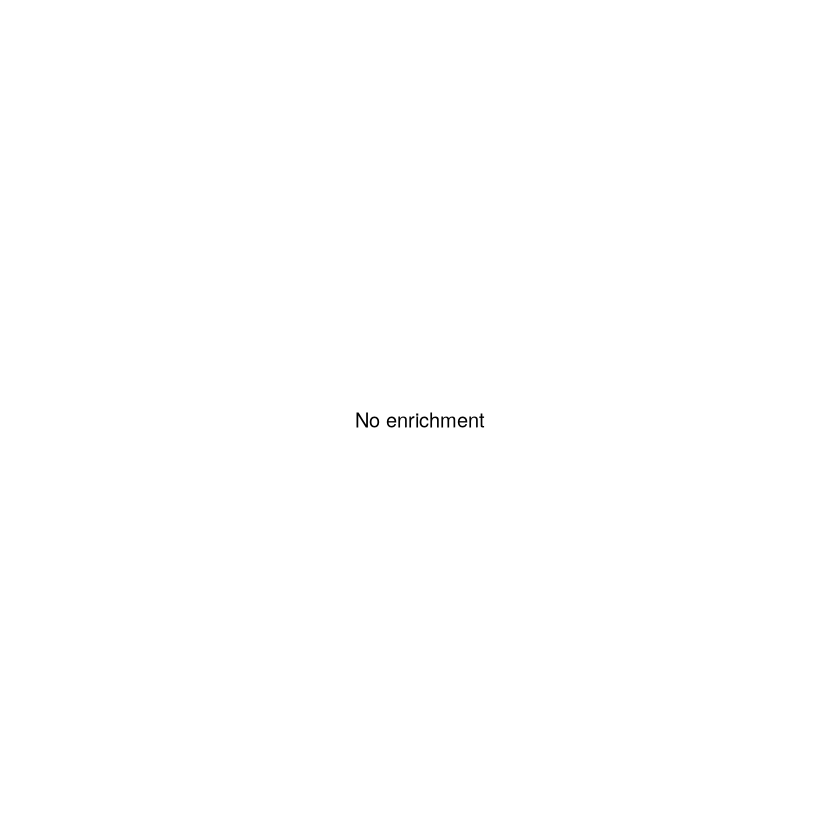

pdf 
  2

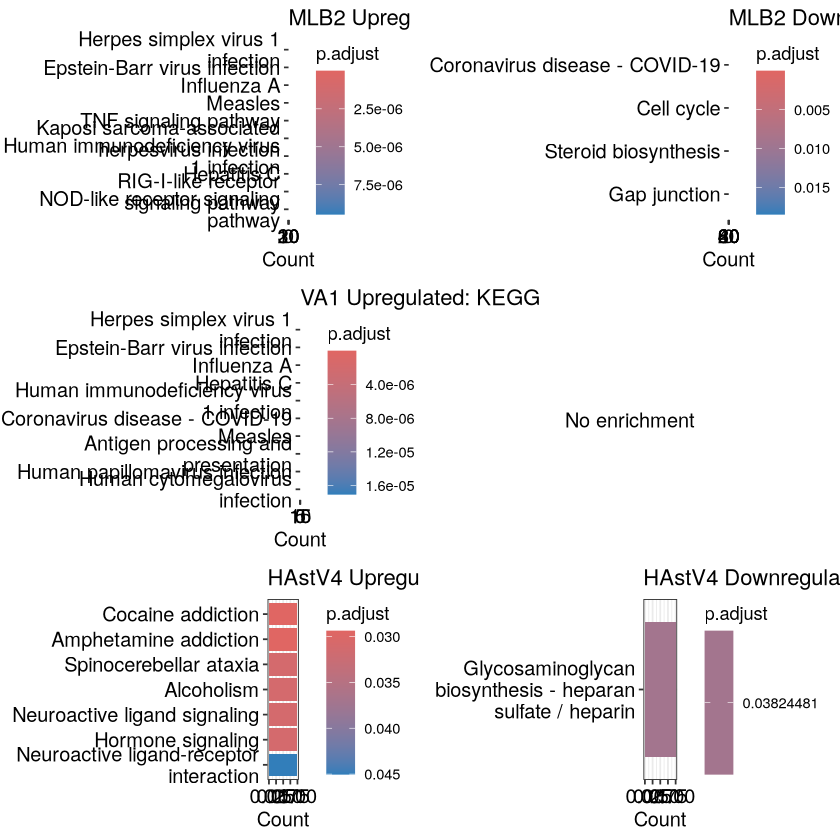

In [104]:
# Создаем barplot'ы (если уже созданы, просто переиспользуем)
plot_MLB2_up <- barplot(MLB2_kegg_up, showCategory = 10, title = "MLB2 Upregulated: KEGG")
plot_MLB2_down <- barplot(MLB2_kegg_down, showCategory = 10, title = "MLB2 Downregulated: KEGG")

plot_VA1_up <- barplot(VA1_kegg_up, showCategory = 10, title = "VA1 Upregulated: KEGG")

# Если VA1_down пуст — создаем заглушку
plot_VA1_down <- grid.text("No enrichment", gp = gpar(fontsize = 12))

plot_HAstV4_up <- barplot(HAstV4_kegg_up, showCategory = 10, title = "HAstV4 Upregulated: KEGG")
plot_HAstV4_down <- barplot(HAstV4_kegg_down, showCategory = 10, title = "HAstV4 Downregulated: KEGG")

# Компоновка в сетку: по 2 графика в строке (up | down)
final_plot <- grid.arrange(
  arrangeGrob(plot_MLB2_up, plot_MLB2_down, ncol = 2),
  arrangeGrob(plot_VA1_up, plot_VA1_down, ncol = 2),
  arrangeGrob(plot_HAstV4_up, plot_HAstV4_down, ncol = 2),
  nrow = 3
)

# Сохранение в PDF
pdf("12_KEGG_barplots_brain_10d.pdf", width = 14, height = 12)
grid.draw(final_plot)
dev.off()


# Reactome Pathway Enrichment (ReactomePA)

In [59]:
#BiocManager::install("ReactomePA")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'ReactomePA'

also installing the dependencies ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘graph’, ‘ggraph’, ‘reactome.db’, ‘graphite’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'aplot', 'BiocManager', 'BiocParallel', 'bit', 'bit64', 'broom',
  'bslib', 'caret', 'cli', 'clock', 'cluster', 'commonmark', 'cpp11', 'curl',
  'data.table', 'DOSE', 'foreign', 'fs', 'future', 'future.apply', 'generics',
  'GenomeInfoDb', 'ggplot2', 'glmnet', 'globals', 'gower', 'hardhat', 'haven',
  'httpuv', 'httr2', 'jsonlite', 'knitr', 'later', 'lattice', 'locfit', 'maps',
  'MASS', 'Matrix', 'mgcv', 'mime', 'nlme', 'openssl', 'parallelly', 'pbdZMQ',
  'pheatmap', 'pillar',

In [61]:
ls()

[1] "deseq_b_HAstV4" "deseq_b_MLB2"   "deseq_b_VA1"    "deseq_results" 
 [5] "drgg"           "f"              "genes"          "gg"            
 [9] "merged"         "pccounts"       "plotPair"       "samples"       
[13] "t"              "t_df"           "t_transposed"   "z"

In [ ]:
#deseq_b_MLB2 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_MLB2_mock.rds')
#deseq_b_VA1 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_VA1_mock.rds')
#deseq_b_HAstV4 = readRDS('../../rds/NGS-20250519/deg_0.05_1/deseq_brain_HAstV4_mock_trypsin.rds')

In [105]:
library(ReactomePA)

# Reactome также требует ENTREZ ID — используем тот же MLB2_up_entrez
MLB2_reactome_up <- enrichPathway(gene         = MLB2_up_entrez$ENTREZID,
                               organism     = "human",
                               pAdjustMethod = "BH",
                               qvalueCutoff  = 0.05,
                               readable      = TRUE)

# Просмотр результатов
head(MLB2_reactome_up)

,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-909733,R-HSA-909733,Interferon alpha/beta signaling,39/386,77/11146,0.5064935,14.625328,22.723001,6.728487e-37,6.836143e-34,6.331860e-34,ADAR/SOCS3/STAT2/IRF7/HLA-E/HLA-B/SAMHD1/ISG20/IFIT5/IRF1/HLA-A/EIF2AK2/HLA-C/IFITM2/HLA-F/IFI27/IFI35/IRF9/IFITM3/USP18/BST2/STAT1/PSMB8/EGR1/ISG15/IFIT1/IFI6/IFITM1/RSAD2/XAF1/MX2/IFIT3/OASL/IFNB1/IFIT2/MX1/OAS3/OAS1/OAS2,39
R-HSA-913531,R-HSA-913531,Interferon Signaling,53/386,269/11146,0.1970260,5.689254,14.745275,8.930870e-26,4.536882e-23,4.202209e-23,IKBKB/ADAR/JAK2/SOCS3/TRIM5/STAT2/ICAM1/UBA7/IRF7/HLA-E/TRIM21/VCAM1/NEDD4/HLA-B/SAMHD1/ISG20/IFIT5/IRF1/HLA-A/EIF2AK2/HLA-C/IFITM2/TRIM25/HLA-F/IFI27/TRIM22/IFI35/B2M/IRF9/IFITM3/USP18/BST2/STAT1/PSMB8/EGR1/RIGI/ISG15/HERC5/IFIT1/IFI6/IFITM1/RSAD2/XAF1/SP100/MX2/IFIT3/OASL/IFNB1/IFIT2/MX1/OAS3/OAS1/OAS2,53
R-HSA-877300,R-HSA-877300,Interferon gamma signaling,23/386,96/11146,0.2395833,6.918124,11.029761,1.128491e-13,3.821823e-11,3.539898e-11,JAK2/SOCS3/TRIM5/ICAM1/IRF7/HLA-E/TRIM21/VCAM1/HLA-B/IRF1/HLA-A/HLA-C/TRIM25/HLA-F/TRIM22/B2M/IRF9/STAT1/SP100/OASL/OAS3/OAS1/OAS2,23
R-HSA-168928,R-HSA-168928,DDX58/IFIH1-mediated induction of interferon-alpha/beta,15/386,82/11146,0.1829268,5.282131,7.371202,1.129704e-07,2.869448e-05,2.657777e-05,NFKB2/IKBKB/RIPK1/UBA7/IRF7/NFKB1/TNFAIP3/DHX58/TRIM25/RIGI/ISG15/HERC5/NLRC5/IFIH1/IFNB1,15
R-HSA-983170,R-HSA-983170,"Antigen Presentation: Folding, assembly and peptide loading of class I MHC",9/386,29/11146,0.3103448,8.961408,8.130601,3.534779e-07,7.182670e-05,6.652825e-05,ERAP1/HLA-E/TAP2/HLA-B/HLA-A/HLA-C/TAP1/HLA-F/B2M,9
R-HSA-1236977,R-HSA-1236977,Endosomal/Vacuolar pathway,6/386,11/11146,0.5454545,15.750353,9.270031,6.617809e-07,1.120616e-04,1.037951e-04,HLA-E/HLA-B/HLA-A/HLA-C/HLA-F/B2M,6


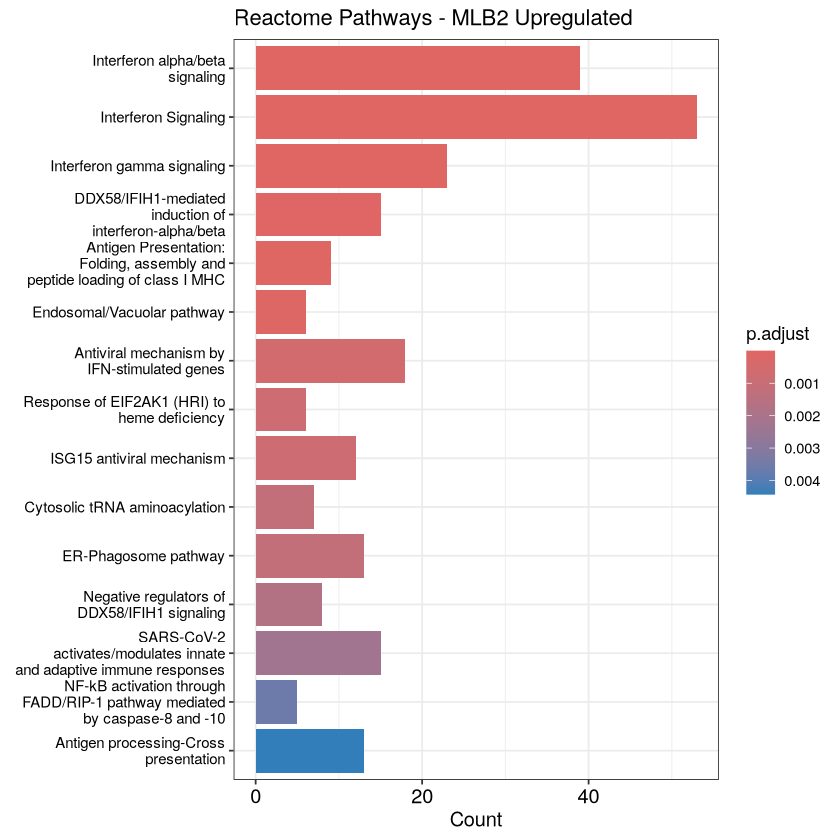

In [117]:
p1 = barplot(MLB2_reactome_up, showCategory = 15, title = "Reactome Pathways - MLB2 Upregulated") +
  theme(axis.text.y = element_text(size = 9))  # или 7, если нужно еще меньше
p1

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'MLB2 Up – Reactome Membership Heatmap' in 'mbcsToSbcs': - substituted for – (U+2013)”


pdf 
  2

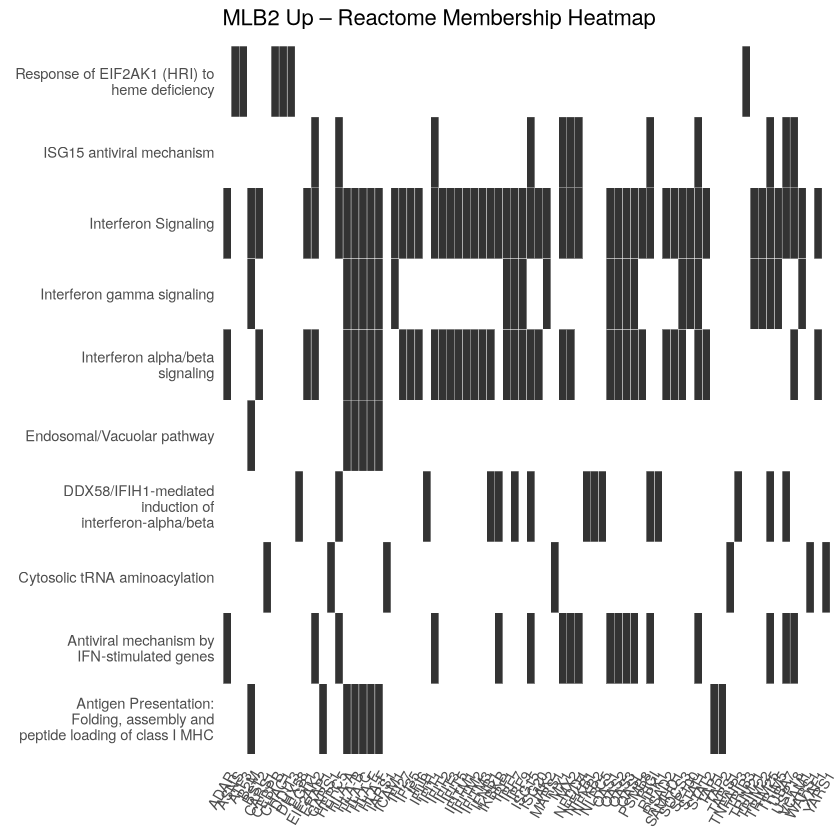

In [123]:
h1 = heatplot(MLB2_reactome_up, 
         showCategory = 10) +
  ggtitle("MLB2 Up – Reactome Membership Heatmap")
h1
pdf("13_REACTOME_heatplot_brain_10d_MLB2_Up.pdf", width = 16, height = 22)
grid.draw(h1)
dev.off()


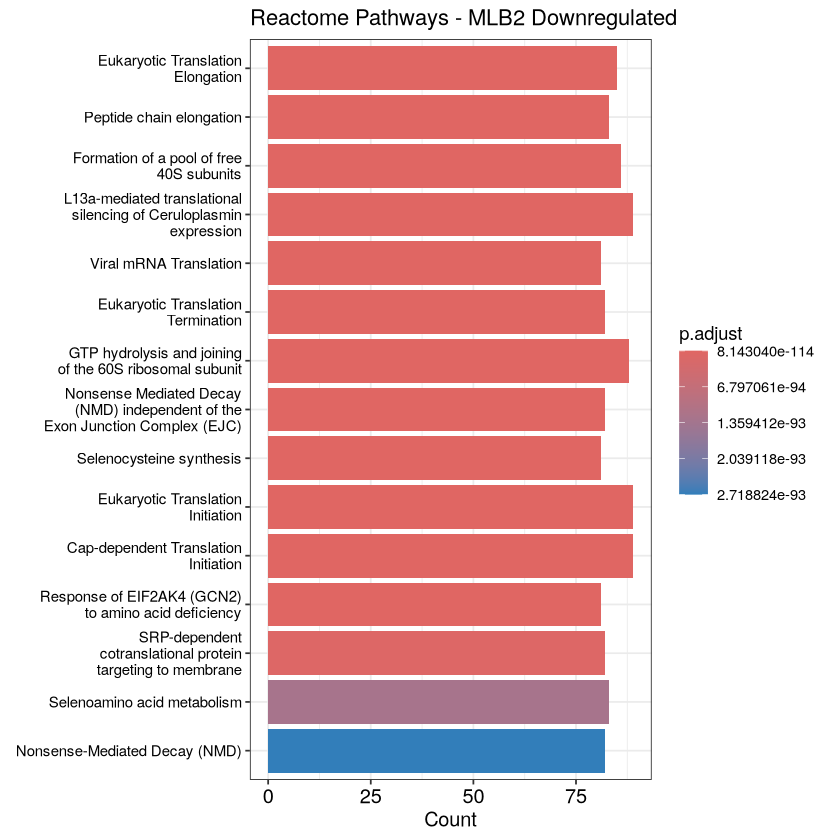

In [118]:
MLB2_reactome_down <- enrichPathway(gene         = MLB2_down_entrez$ENTREZID,
                               organism     = "human",
                               pAdjustMethod = "BH",
                               qvalueCutoff  = 0.05,
                               readable      = TRUE)

p2 = barplot(MLB2_reactome_down, showCategory = 15, title = "Reactome Pathways - MLB2 Downregulated") +
  theme(axis.text.y = element_text(size = 9)) 
p2

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'MLB2 Down – Reactome Membership Heatmap' in 'mbcsToSbcs': - substituted for – (U+2013)”


pdf 
  2

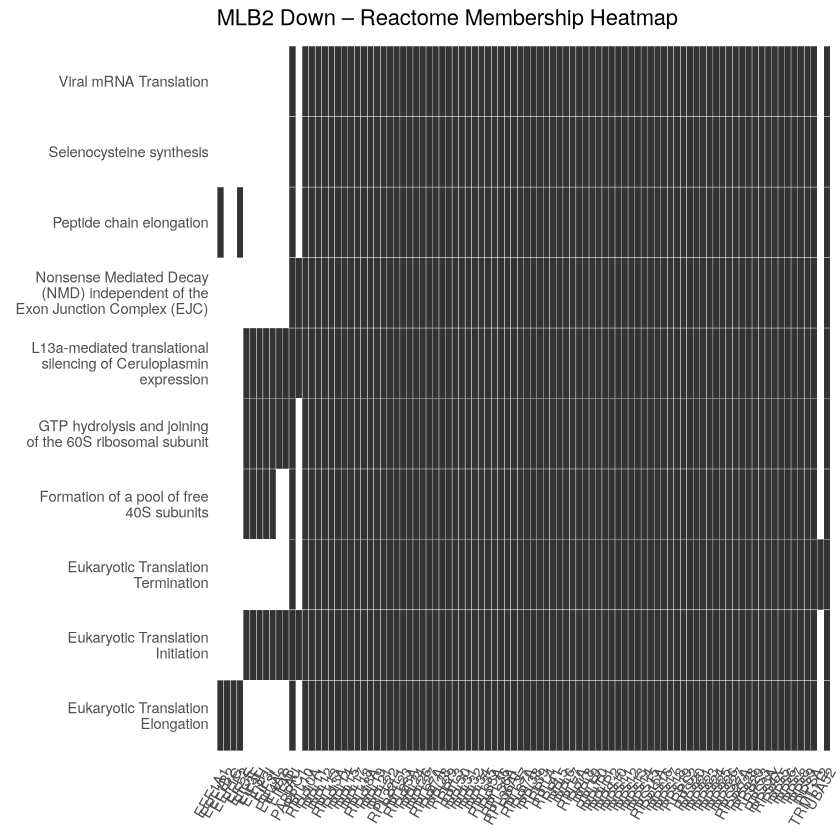

In [124]:
h2 = heatplot(MLB2_reactome_down, 
         showCategory = 10) +
  ggtitle("MLB2 Down – Reactome Membership Heatmap")
h2
pdf("13_REACTOME_heatplot_brain_10d_MLB2_Down.pdf", width = 16, height = 22)
grid.draw(h2)
dev.off()


In [112]:
VA1_reactome_up <- enrichPathway(gene         = VA1_up_entrez$ENTREZID,
                                 organism     = "human",
                                 pAdjustMethod = "BH",   # ← здесь исправлено
                                 qvalueCutoff  = 0.05,
                                 readable      = TRUE)

# Просмотр результатов
head(VA1_reactome_up)


,ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-909733,R-HSA-909733,Interferon alpha/beta signaling,25/76,77/11146,0.32467532,47.61620,34.00956,7.640423e-37,2.979765e-34,2.493191e-34,SAMHD1/IFIT5/HLA-E/EIF2AK2/IFI27/HLA-B/USP18/IRF9/IFITM3/STAT1/HLA-C/HLA-A/PSMB8/BST2/ISG15/IFIT1/IFITM1/MX2/OASL/IFI6/IFIT3/IFIT2/MX1/OAS3/OAS1,25
R-HSA-913531,R-HSA-913531,Interferon Signaling,32/76,269/11146,0.11895911,17.44629,22.62365,2.886595e-32,5.628861e-30,4.709708e-30,TRIM5/SAMHD1/IFIT5/HLA-E/EIF2AK2/IFI27/TRIM22/TRIM25/HLA-B/USP18/IRF9/IFITM3/STAT1/HLA-C/RIGI/HERC5/HLA-A/B2M/SP100/PSMB8/BST2/ISG15/IFIT1/IFITM1/MX2/OASL/IFI6/IFIT3/IFIT2/MX1/OAS3/OAS1,32
R-HSA-877300,R-HSA-877300,Interferon gamma signaling,14/76,96/11146,0.14583333,21.38761,16.62240,2.061987e-15,2.680583e-13,2.242863e-13,TRIM5/HLA-E/TRIM22/TRIM25/HLA-B/IRF9/STAT1/HLA-C/HLA-A/B2M/SP100/OASL/OAS3/OAS1,14
R-HSA-1169410,R-HSA-1169410,Antiviral mechanism by IFN-stimulated genes,13/76,149/11146,0.08724832,12.79566,12.01022,1.903168e-11,1.855589e-09,1.552585e-09,EIF2AK2/TRIM25/USP18/STAT1/RIGI/HERC5/ISG15/IFIT1/MX2/OASL/MX1/OAS3/OAS1,13
R-HSA-1169408,R-HSA-1169408,ISG15 antiviral mechanism,10/76,73/11146,0.13698630,20.09012,13.55846,5.193395e-11,4.050848e-09,3.389374e-09,EIF2AK2/TRIM25/USP18/STAT1/RIGI/HERC5/ISG15/IFIT1/MX2/MX1,10
R-HSA-983170,R-HSA-983170,"Antigen Presentation: Folding, assembly and peptide loading of class I MHC",7/76,29/11146,0.24137931,35.40018,15.36876,7.153552e-10,4.649808e-08,3.890528e-08,TAP2/HLA-E/HLA-B/TAP1/HLA-C/HLA-A/B2M,7


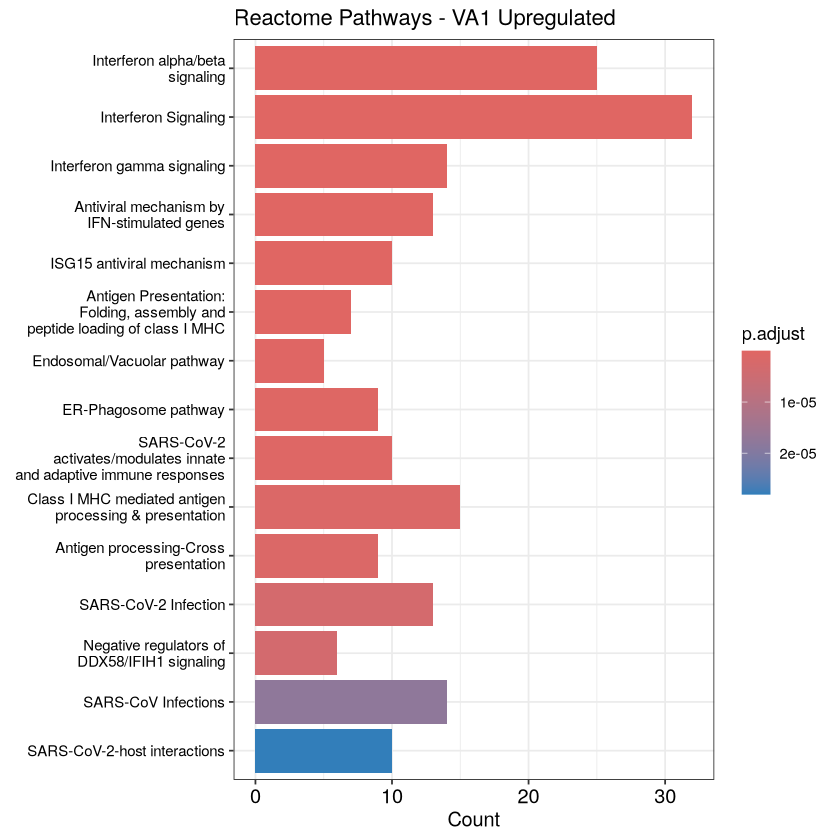

In [119]:
p3 = barplot(VA1_reactome_up, showCategory = 15, title = "Reactome Pathways - VA1 Upregulated") +
  theme(axis.text.y = element_text(size = 9))  # или 7, если нужно еще меньше
p3

Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“for 'VA1 Up – Reactome Membership Heatmap' in 'mbcsToSbcs': - substituted for – (U+2013)”


pdf 
  2

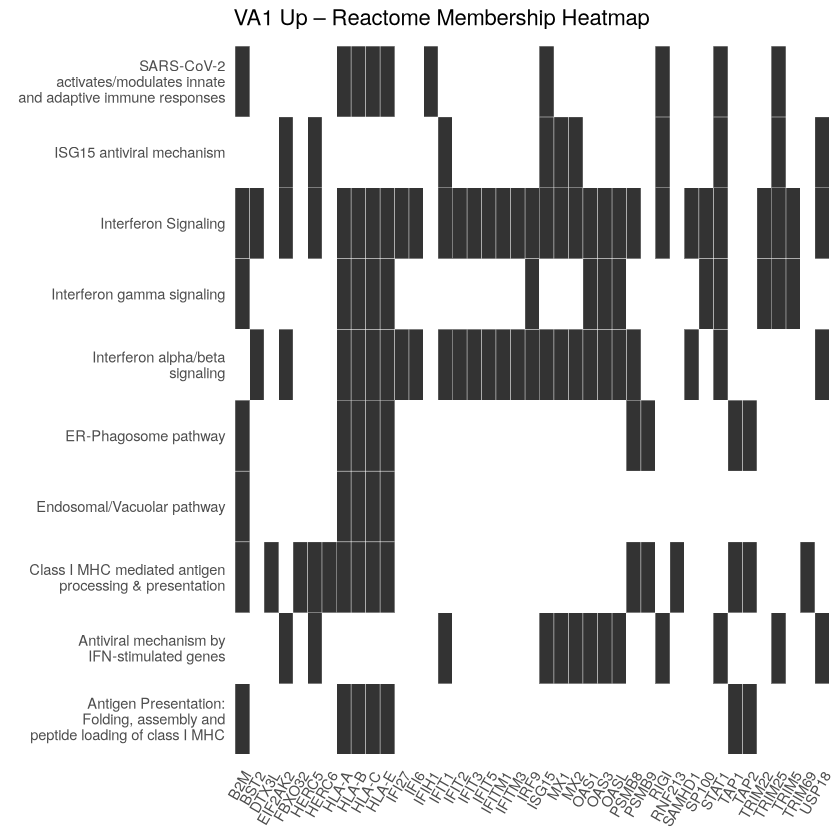

In [127]:
h3 = heatplot(VA1_reactome_up, 
         showCategory = 10) +
  ggtitle("VA1 Up – Reactome Membership Heatmap")
h3
pdf("13_REACTOME_heatplot_brain_10d_VA1_Up.pdf", width = 16, height = 22)
grid.draw(h3)
dev.off()


In [114]:
# Reactome-анализ
VA1_reactome_down <- enrichPathway(gene         = VA1_down_entrez$ENTREZID,
                                   organism     = "human",
                                   pAdjustMethod = "BH",
                                   qvalueCutoff  = 0.05,
                                   readable      = TRUE)

# Просмотр результатов
head(VA1_reactome_down)


ID,Description,GeneRatio,BgRatio,RichFactor,FoldEnrichment,zScore,pvalue,p.adjust,qvalue,geneID,Count
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>


In [115]:
p4 = barplot(VA1_reactome_down, showCategory = 15, title = "Reactome Pathways - VA1 Downregulated") +
  theme(axis.text.y = element_text(size = 10))  # или 7, если нужно еще меньше
p4

Warning message in rep(yes, length.out = len):
“'x' is NULL so the result will be NULL”
ERROR while rich displaying an object: Error in ans[ypos] <- rep(yes, length.out = len)[ypos]: replacement has length zero

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)

In [126]:
h4 = heatplot(VA1_reactome_down, 
         showCategory = 10) +
  ggtitle("VA1 Down – Reactome Membership Heatmap")
h4
pdf("13_REACTOME_heatplot_brain_10d_VA1_Down.pdf", width = 16, height = 22)
grid.draw(h4)
dev.off()


ERROR while rich displaying an object: Error in `geom_tile()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Gene' not found

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .   

ERROR: [1m[33mError[39m in `geom_tile()`:[22m
[1m[22m[33m![39m Problem while computing aesthetics.
[36mℹ[39m Error occurred in the 1st layer.
[1mCaused by error:[22m
[33m![39m object 'Gene' not found


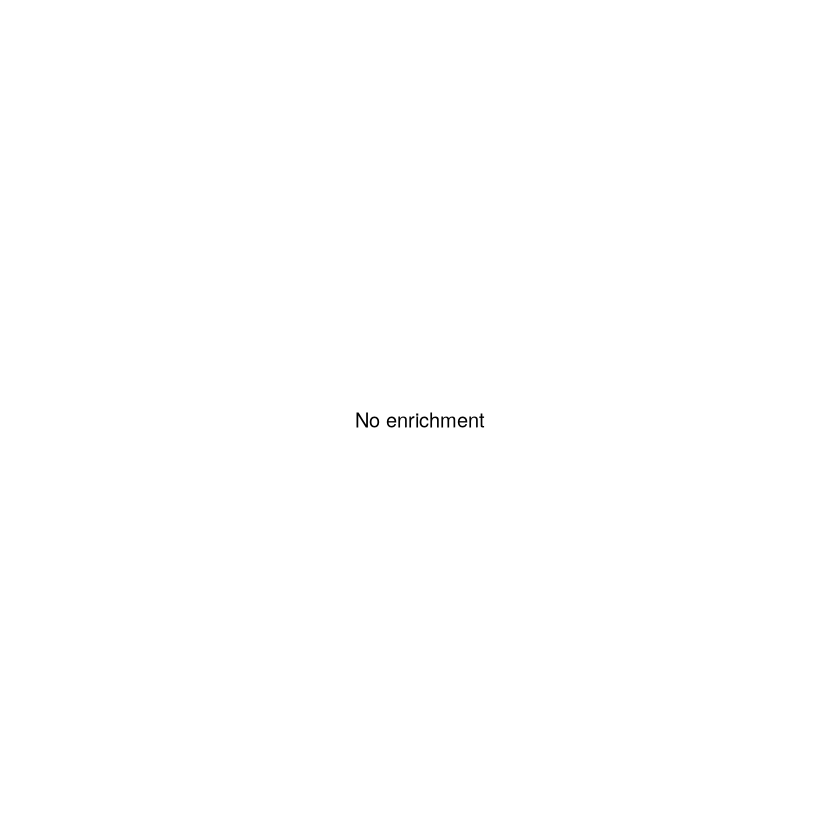

pdf 
  2

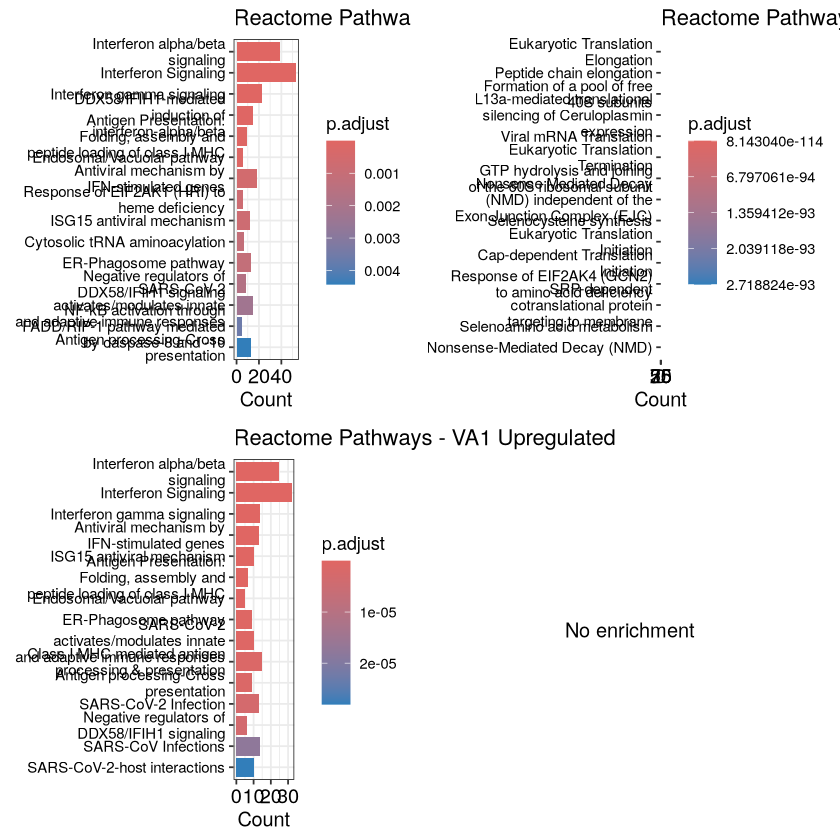

In [121]:
# Если VA1_down пуст — создаем заглушку
p4 <- grid.text("No enrichment", gp = gpar(fontsize = 12))

# Компоновка в сетку: по 2 графика в строке (up | down)
final_plot_Reactome <- grid.arrange(
  arrangeGrob(p1, p2, ncol = 2),
  arrangeGrob(p3, p4, ncol = 2),
  nrow = 2
)

# Сохранение в PDF
pdf("13_REACTOME_barplots_brain_10d.pdf", width = 16, height = 14)
grid.draw(final_plot_Reactome)
dev.off()
